# Data Preprocessing

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the CSV file
file_path = '../data/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the summary information
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
     Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0         NaN             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural           

In [2]:
# Filling missing values
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Mapping categorical variables to numerical values
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int)
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data['Property_Area'] = data['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

# Display the cleaned and transformed data
data_cleaned_info = data.info()
data_cleaned_head = data.head()

data_cleaned_info, data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


(None,
     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
 0  LP001002       1        0           0          1              0   
 1  LP001003       1        1           1          1              0   
 2  LP001005       1        1           0          1              1   
 3  LP001006       1        1           0          0              0   
 4  LP001008       1        0           0          1              0   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0       128.0             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History  Property_Area  Loan_Status  
 0             1.0              2            1  
 1             1.0              0

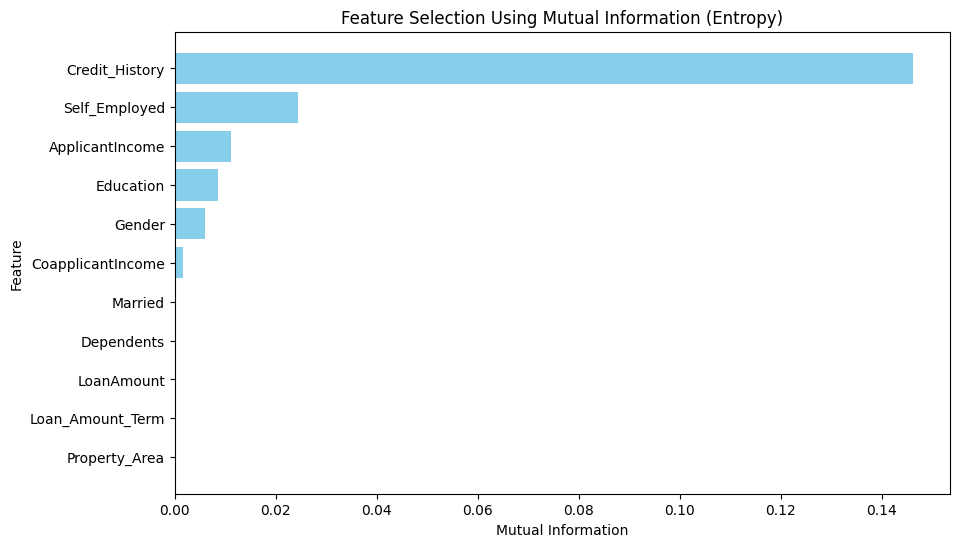

In [3]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Select features (X) and target variable (Y)
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot the mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Feature Selection Using Mutual Information (Entropy)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest MI feature on top
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

#Select features (X) and target variable (Y)
x = data[['Credit_History', 'Self_Employed', 'ApplicantIncome', 'Education', 'Gender', 'CoapplicantIncome']]
y = data['Loan_Status']

#Split the data into (75%) training and (25%) testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#Print the shapes of the sets
print(f"Training set shapes : {x_train.shape}, {y_train.shape}")
print(f"Testing set shapes  : {x_test.shape}, {y_test.shape}")

Training set shapes : (460, 6), (460,)
Testing set shapes  : (154, 6), (154,)


In [5]:
# Standardization

from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train[0])

[ 0.40928314 -0.39100154 -0.3670333  -1.87344707  0.48637346  0.08668355]


In [6]:
# Data Sampling Technique

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print(x_train.shape)
print(x_test.shape)

# Check duplicates for train data
x_train_reset_index = pd.DataFrame(x_train).reset_index(drop=True)
y_train_reset_index = pd.Series(y_train, name='Loan_Status').reset_index(drop=True)
train_data = x_train_reset_index.join(y_train_reset_index)
train_data = train_data.rename(columns={0: 'Credit_History', 1: 'Self_Employed', 2: 'ApplicantIncome', 3: 'Education', 4: 'Gender', 5:'CoapplicantIncome'})
train_data = train_data.drop_duplicates()

# Check duplicates for test data
x_test_reset_index = pd.DataFrame(x_test).reset_index(drop=True)
y_test_reset_index = pd.Series(y_test, name='Loan_Status').reset_index(drop=True)
test_data = x_test_reset_index.join(y_test_reset_index)
test_data = test_data.rename(columns={0: 'Credit_History', 1: 'Self_Employed', 2: 'ApplicantIncome', 3: 'Education', 4: 'Gender', 5:'CoapplicantIncome'})
test_data = test_data.drop_duplicates()

print(train_data.shape)
print(test_data.shape)

# Check missing value
print(train_data.isnull().sum())

(644, 6)
(154, 6)
(639, 7)
(154, 7)
Credit_History       0
Self_Employed        0
ApplicantIncome      0
Education            0
Gender               0
CoapplicantIncome    0
Loan_Status          0
dtype: int64


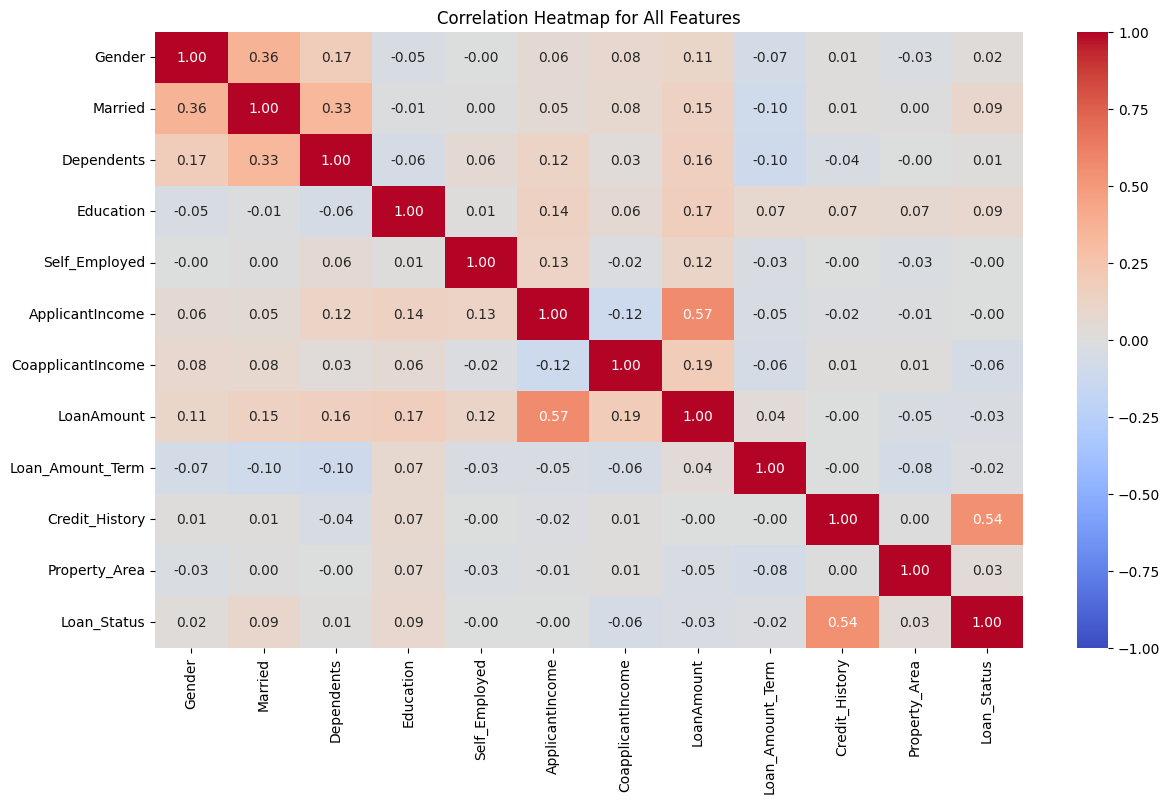

In [7]:
# Data visualization - Correlation heatmap
# Drop the Loan_ID column
data_numeric = data.drop(['Loan_ID'], axis=1)

# Check if there are any non-numeric columns left
non_numeric_columns = data_numeric.select_dtypes(exclude=['number']).columns

# If there are any, you need to convert them to numeric
# For example, if 'Gender' is a non-numeric column:
# data_numeric['Gender'] = data_numeric['Gender'].map({'Male': 1, 'Female': 0})

# Once all columns are numeric, you can calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap for All Features')
plt.show()


# Modeling

## Model 1 - Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
LgR_model = LogisticRegression()
LgR_model.fit(x_train, y_train)

LogisticRegression()

In [9]:
LgR_y_pred_train = LgR_model.predict(x_train)
LgR_y_pred_test = LgR_model.predict(x_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print(f"F1 Score on train data by LOGISTIC REGRESSION Classifier : {f1_score(y_train, LgR_y_pred_train)*100}")
print(f"F1 Score on test data by LOGISTIC REGRESSION Classifier  : {f1_score(y_test, LgR_y_pred_test)*100}")

F1 Score on train data by LOGISTIC REGRESSION Classifier : 78.56257744733581
F1 Score on test data by LOGISTIC REGRESSION Classifier  : 84.84848484848484


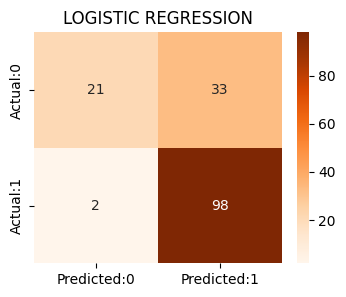

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

LgR_cm = pd.DataFrame(data = confusion_matrix(y_test, LgR_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'],)

plt.figure(figsize = (4, 3))
plt.title('LOGISTIC REGRESSION')
sns.heatmap(LgR_cm, annot = True, fmt = 'd', cmap = "Oranges")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, LgR_y_pred_test))

In [11]:
from sklearn.model_selection import GridSearchCV
LgR_params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
}
LgR_gridSearch = GridSearchCV(LgR_model, LgR_params, cv=4, scoring = 'f1')
LgR_gridSearch.fit(x_train, y_train)

LgR_bestModel = LgR_gridSearch.best_estimator_
LgR_tuned_y_pred_train = LgR_bestModel.predict(x_train)
LgR_tuned_y_pred_test = LgR_bestModel.predict(x_test)

In [12]:
print(f"Best Parameters Found: {LgR_gridSearch.best_params_}")

print(f"F1 Score on train data by LOGISTIC REGRESSION Classifier       : {f1_score(y_train, LgR_y_pred_train)*100}")
print(f"F1 Score on train data by TUNED LOGISTIC REGRESSION Classifier : {f1_score(y_train, LgR_tuned_y_pred_train)*100}")
print(f"F1 Score on test data by LOGISTIC REGRESSION Classifier        : {f1_score(y_test, LgR_y_pred_test)*100}")
print(f"F1 Score on test data by TUNED LOGISTIC REGRESSION Classifier  : {f1_score(y_test, LgR_tuned_y_pred_test)*100}")

Best Parameters Found: {'penalty': 'l1', 'solver': 'liblinear'}
F1 Score on train data by LOGISTIC REGRESSION Classifier       : 78.56257744733581
F1 Score on train data by TUNED LOGISTIC REGRESSION Classifier : 78.56257744733581
F1 Score on test data by LOGISTIC REGRESSION Classifier        : 84.84848484848484
F1 Score on test data by TUNED LOGISTIC REGRESSION Classifier  : 84.84848484848484


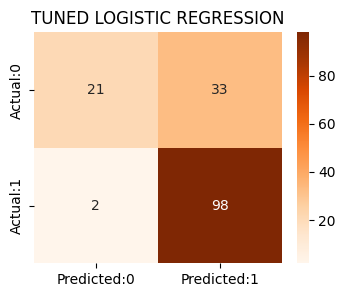

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [13]:
LgR_cm = pd.DataFrame(data = confusion_matrix(y_test, LgR_tuned_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'],)

plt.figure(figsize = (4, 3))
plt.title('TUNED LOGISTIC REGRESSION')
sns.heatmap(LgR_cm, annot = True, fmt = 'd', cmap = "Oranges")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, LgR_tuned_y_pred_test))

## Model 2 - Support Vector Machine

In [14]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', probability=True)
SVM_model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [15]:
SVM_y_pred_train = SVM_model.predict(x_train)
SVM_y_pred_test = SVM_model.predict(x_test)

print(f"F1 Score on train data by SVM Classifier : {f1_score(y_train, SVM_y_pred_train)*100}")
print(f"F1 Score on test data by SVM Classifier  : {f1_score(y_test, SVM_y_pred_test)*100}")

F1 Score on train data by SVM Classifier : 78.56257744733581
F1 Score on test data by SVM Classifier  : 84.84848484848484


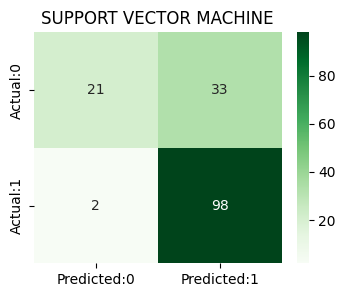

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [16]:
SVM_cm = pd.DataFrame(data = confusion_matrix(y_test, SVM_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('SUPPORT VECTOR MACHINE')
sns.heatmap(SVM_cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, SVM_y_pred_test))

In [17]:
SVM_params = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'sigmoid'],
    'gamma': [0.01, 0.1, 1, 2, 5, 10],
    'class_weight': ['balanced', None]
} 
SVM_gridSearch = GridSearchCV(SVM_model, SVM_params, cv = 4, scoring = 'f1')
SVM_gridSearch.fit(x_train, y_train)

SVM_bestModel = SVM_gridSearch.best_estimator_
SVM_tuned_y_pred_train = SVM_bestModel.predict(x_train)
SVM_tuned_y_pred_test = SVM_bestModel.predict(x_test)

In [18]:
print(f"Best Parameters Found: {SVM_gridSearch.best_params_}")
print(f"F1 Score on train data by SVM Classifier       : {f1_score(y_train, SVM_y_pred_train)*100}")
print(f"F1 Score on train data by TUNED SVM Classifier : {f1_score(y_train, SVM_tuned_y_pred_train)*100}")
print(f"F1 Score on test data by SVM Classifier        : {f1_score(y_test, SVM_y_pred_test)*100}")
print(f"F1 Score on test data by TUNED SVM Classifier  : {f1_score(y_test, SVM_tuned_y_pred_test)*100}")

Best Parameters Found: {'C': 1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
F1 Score on train data by SVM Classifier       : 78.56257744733581
F1 Score on train data by TUNED SVM Classifier : 80.6970509383378
F1 Score on test data by SVM Classifier        : 84.84848484848484
F1 Score on test data by TUNED SVM Classifier  : 84.16289592760181


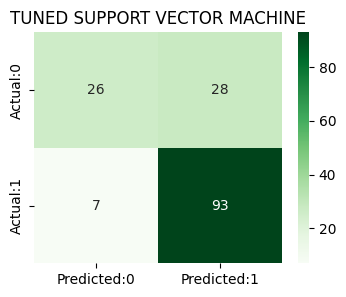

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.79      0.48      0.60        54
           1       0.77      0.93      0.84       100

    accuracy                           0.77       154
   macro avg       0.78      0.71      0.72       154
weighted avg       0.78      0.77      0.76       154



In [19]:
SVM_cm = pd.DataFrame(data = confusion_matrix(y_test, SVM_tuned_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('TUNED SUPPORT VECTOR MACHINE')
sns.heatmap(SVM_cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, SVM_tuned_y_pred_test))

## Model 3 - Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [21]:
NB_y_pred_train = NB_model.predict(x_train)
NB_y_pred_test = NB_model.predict(x_test)

print(f"F1 Score on train data by NAIVE BAYES Classifier : {f1_score(y_train, NB_y_pred_train)*100}")
print(f"F1 Score on test data by NAIVE BAYES Classifier  : {f1_score(y_test, NB_y_pred_test)*100}")

F1 Score on train data by NAIVE BAYES Classifier : 78.08564231738035
F1 Score on test data by NAIVE BAYES Classifier  : 85.46255506607929


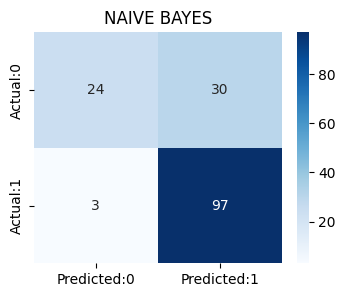

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.89      0.44      0.59        54
           1       0.76      0.97      0.85       100

    accuracy                           0.79       154
   macro avg       0.83      0.71      0.72       154
weighted avg       0.81      0.79      0.76       154



In [22]:
NB_cm = pd.DataFrame(data = confusion_matrix(y_test, NB_y_pred_test),
                     columns = ['Predicted:0', 'Predicted:1'],
                     index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('NAIVE BAYES')
sns.heatmap(NB_cm, annot = True, fmt = 'd', cmap = "Blues")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, NB_y_pred_test))

In [23]:
NB_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
} 
NB_gridSearch = GridSearchCV(NB_model, NB_params, cv=4, scoring = 'f1')
NB_gridSearch.fit(x_train, y_train)

NB_bestModel = NB_gridSearch.best_estimator_
NB_tuned_y_pred_train = NB_bestModel.predict(x_train)
NB_tuned_y_pred_test = NB_bestModel.predict(x_test)

In [24]:
print(f"Best Parameters Found: {NB_gridSearch.best_params_}")
print(f"F1 Score on train data by NAIVE BAYES Classifier       : {f1_score(y_train, NB_y_pred_train)*100}")
print(f"F1 Score on train data by TUNED NAIVE BAYES Classifier : {f1_score(y_train, NB_tuned_y_pred_train)*100}")
print(f"F1 Score on test data by NAIVE BAYES Classifier        : {f1_score(y_test, NB_y_pred_test)*100}")
print(f"F1 Score on test data by TUNED NAIVE BAYES Classifier  : {f1_score(y_test, NB_tuned_y_pred_test)*100}")

Best Parameters Found: {'var_smoothing': np.float64(1.0)}
F1 Score on train data by NAIVE BAYES Classifier       : 78.08564231738035
F1 Score on train data by TUNED NAIVE BAYES Classifier : 78.44611528822055
F1 Score on test data by NAIVE BAYES Classifier        : 85.46255506607929
F1 Score on test data by TUNED NAIVE BAYES Classifier  : 84.71615720524017


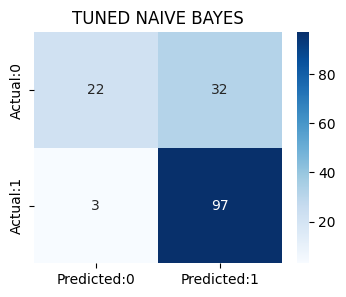

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        54
           1       0.75      0.97      0.85       100

    accuracy                           0.77       154
   macro avg       0.82      0.69      0.70       154
weighted avg       0.80      0.77      0.75       154



In [25]:
NB_cm = pd.DataFrame(data = confusion_matrix(y_test, NB_tuned_y_pred_test),
                     columns = ['Predicted:0', 'Predicted:1'],
                     index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('TUNED NAIVE BAYES')
sns.heatmap(NB_cm, annot = True, fmt = 'd', cmap = "Blues")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, NB_tuned_y_pred_test))

## Model 4 - Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
RF_y_pred_train = RF_model.predict(x_train)
RF_y_pred_test = RF_model.predict(x_test)

print(f"F1 Score on train data by RANDOM FOREST Classifier : {f1_score(y_train, RF_y_pred_train)*100}")
print(f"F1 Score on test data by RANDOM FOREST Classifier  : {f1_score(y_test, RF_y_pred_test)*100}")

F1 Score on train data by RANDOM FOREST Classifier : 99.84447900466563
F1 Score on test data by RANDOM FOREST Classifier  : 78.64077669902912


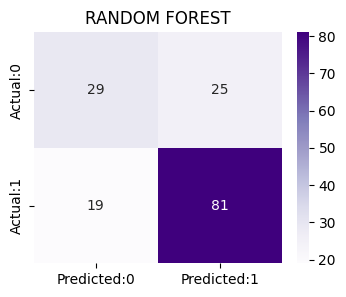

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.60      0.54      0.57        54
           1       0.76      0.81      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154



In [28]:
RF_cm = pd.DataFrame(data = confusion_matrix(y_test, RF_y_pred_test),
                     columns = ['Predicted:0', 'Predicted:1'],
                     index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('RANDOM FOREST')
sns.heatmap(RF_cm, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, RF_y_pred_test))

In [29]:
RF_params = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
} 
RF_gridSearch = GridSearchCV(RF_model, RF_params, scoring = 'f1')
RF_gridSearch.fit(x_train, y_train)

RF_bestModel = RF_gridSearch.best_estimator_
RF_tuned_y_pred_train = RF_bestModel.predict(x_train)
RF_tuned_y_pred_test = RF_bestModel.predict(x_test)

In [30]:
print(f"Best Parameters Found: {RF_gridSearch.best_params_}")
print(f"F1 Score on train data by RANDOM FOREST Classifier       : {f1_score(y_train, RF_y_pred_train)*100}")
print(f"F1 Score on train data by TUNED RANDOM FOREST Classifier : {f1_score(y_train, RF_tuned_y_pred_train)*100}")
print(f"F1 Score on test data by RANDOM FOREST Classifier        : {f1_score(y_test, RF_y_pred_test)*100}")
print(f"F1 Score on test data by TUNED RANDOM FOREST Classifier  : {f1_score(y_test, RF_tuned_y_pred_test)*100}")

Best Parameters Found: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}
F1 Score on train data by RANDOM FOREST Classifier       : 99.84447900466563
F1 Score on train data by TUNED RANDOM FOREST Classifier : 91.54518950437318
F1 Score on test data by RANDOM FOREST Classifier        : 78.64077669902912
F1 Score on test data by TUNED RANDOM FOREST Classifier  : 83.72093023255815


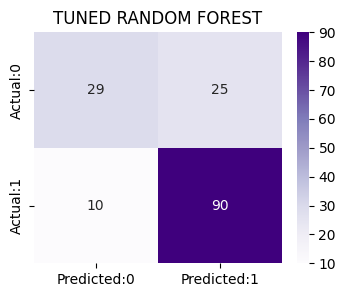

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.74      0.54      0.62        54
           1       0.78      0.90      0.84       100

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [31]:
RF_cm = pd.DataFrame(data = confusion_matrix(y_test, RF_tuned_y_pred_test),
                     columns = ['Predicted:0', 'Predicted:1'],
                     index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('TUNED RANDOM FOREST')
sns.heatmap(RF_cm, annot = True, fmt = 'd', cmap = "Purples")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, RF_tuned_y_pred_test))

## Model 5 - Extreme Gradient Boost

In [32]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
XGB_y_pred_train = XGB_model.predict(x_train)
XGB_y_pred_test = XGB_model.predict(x_test)

print(f"F1 Score on train data by XGBOOST Classifier : {f1_score(y_train, XGB_y_pred_train)*100}")
print(f"F1 Score on test data by XGBOOST Classifier  : {f1_score(y_test, XGB_y_pred_test)*100}")

F1 Score on train data by XGBOOST Classifier : 95.2959028831563
F1 Score on test data by XGBOOST Classifier  : 78.84615384615384


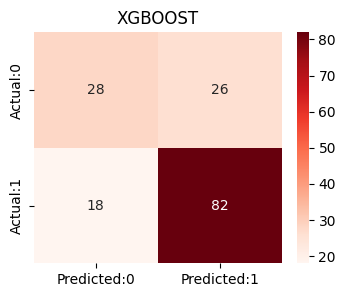

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.61      0.52      0.56        54
           1       0.76      0.82      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [34]:
XGB_cm = pd.DataFrame(data = confusion_matrix(y_test, XGB_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('XGBOOST')
sns.heatmap(XGB_cm, annot = True, fmt = 'd', cmap = "Reds")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, XGB_y_pred_test))

In [35]:
XGB_params = {
    'learning_rate': [0.01, 0.1, 1, 2, 5],
    'max_depth': [None, 10, 20, 30],
    'n_estimators': [10, 50, 100],
    'gamma': [10, 5, 2, 1]
} 
XGB_gridSearch = GridSearchCV(XGB_model, XGB_params,cv=4, scoring = 'f1')
XGB_gridSearch.fit(x_train, y_train)

XGB_bestModel = XGB_gridSearch.best_estimator_
XGB_tuned_y_pred_train = XGB_bestModel.predict(x_train)
XGB_tuned_y_pred_test = XGB_bestModel.predict(x_test)

In [36]:
print(f"Best Parameters Found: {XGB_gridSearch.best_params_}")
print(f"F1 Score on train data by XGBOOST Classifier       : {f1_score(y_train, XGB_y_pred_train)*100}")
print(f"F1 Score on train data by TUNED XGBOOST Classifier : {f1_score(y_train, XGB_tuned_y_pred_train)*100}")
print(f"F1 Score on test data by XGBOOST Classifier        : {f1_score(y_test, XGB_y_pred_test)*100}")
print(f"F1 Score on test data by TUNED XGBOOST Classifier  : {f1_score(y_test, XGB_tuned_y_pred_test)*100}")

Best Parameters Found: {'gamma': 5, 'learning_rate': 1, 'max_depth': None, 'n_estimators': 10}
F1 Score on train data by XGBOOST Classifier       : 95.2959028831563
F1 Score on train data by TUNED XGBOOST Classifier : 79.7886393659181
F1 Score on test data by XGBOOST Classifier        : 78.84615384615384
F1 Score on test data by TUNED XGBOOST Classifier  : 80.36529680365297


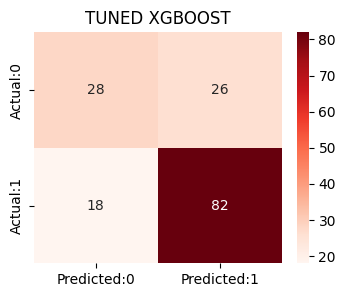

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.66      0.43      0.52        54
           1       0.74      0.88      0.80       100

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [37]:
XGB_cm = pd.DataFrame(data = confusion_matrix(y_test, XGB_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('TUNED XGBOOST')
sns.heatmap(XGB_cm, annot = True, fmt = 'd', cmap = "Reds")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, XGB_tuned_y_pred_test))

## Model 6 - KNN

In [38]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, weights='distance', metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [39]:
KNN_y_pred_train = KNN_model.predict(x_train)
KNN_y_pred_test = KNN_model.predict(x_test)

print(f"F1 Score on train data by KNN MODEL Classifier : {f1_score(y_train, KNN_y_pred_train)*100}")
print(f"F1 Score on test data by KNN MODEL Classifier  : {f1_score(y_test, KNN_y_pred_test)*100}")

F1 Score on train data by KNN MODEL Classifier : 99.84447900466563
F1 Score on test data by KNN MODEL Classifier  : 80.19323671497585


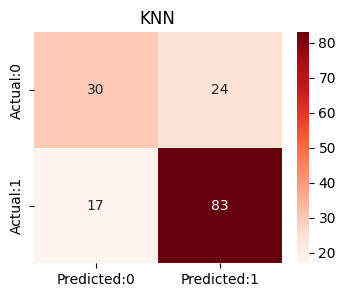

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.64      0.56      0.59        54
           1       0.78      0.83      0.80       100

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154



In [40]:
KNN_cm = pd.DataFrame(data = confusion_matrix(y_test, KNN_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('KNN')
sns.heatmap(KNN_cm, annot = True, fmt = 'd', cmap = "Reds")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, KNN_y_pred_test))

In [41]:
KNN_params = {
    'n_neighbors': np.arange(2, 30, 1),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance'],
} 
KNN_gridSearch = GridSearchCV(KNN_model, KNN_params,cv=4, scoring = 'f1')
KNN_gridSearch.fit(x_train, y_train)

KNN_bestModel = KNN_gridSearch.best_estimator_
KNN_tuned_y_pred_train = KNN_bestModel.predict(x_train)
KNN_tuned_y_pred_test = KNN_bestModel.predict(x_test)

In [42]:
print(f"Best Parameters Found: {KNN_gridSearch.best_params_}")
print(f"F1 Score on train data by KNN MODEL Classifier       : {f1_score(y_train, KNN_y_pred_train)*100}")
print(f"F1 Score on train data by TUNED KNN MODEL Classifier : {f1_score(y_train, KNN_tuned_y_pred_train)*100}")
print(f"F1 Score on test data by KNN MODEL Classifier        : {f1_score(y_test, KNN_y_pred_test)*100}")
print(f"F1 Score on test data by TUNED KNN MODEL Classifier  : {f1_score(y_test, KNN_tuned_y_pred_test)*100}")

Best Parameters Found: {'metric': 'manhattan', 'n_neighbors': np.int64(21), 'weights': 'uniform'}
F1 Score on train data by KNN MODEL Classifier       : 99.84447900466563
F1 Score on train data by TUNED KNN MODEL Classifier : 77.79310344827586
F1 Score on test data by KNN MODEL Classifier        : 80.19323671497585
F1 Score on test data by TUNED KNN MODEL Classifier  : 80.95238095238095


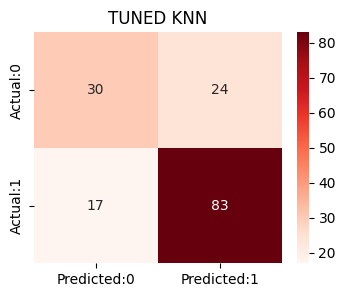

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.66      0.54      0.59        54
           1       0.77      0.85      0.81       100

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [43]:
KNN_cm = pd.DataFrame(data = confusion_matrix(y_test, KNN_y_pred_test),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('TUNED KNN')
sns.heatmap(KNN_cm, annot = True, fmt = 'd', cmap = "Reds")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, KNN_tuned_y_pred_test))

## Combined Model

In [44]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lgr', LgR_model), # Model 1
    ('svm', SVM_model), # Model 2
    ('nb', NB_model),   # Model 3
    ('rf', RF_model),   # Model 4
    ('xgb', XGB_model), # Model 5
    ('knn', KNN_model)  # Model 6
], voting = 'soft')

# Train on the training data
voting_clf.fit(x_train, y_train)

# Predict on the test set
combined_pred = voting_clf.predict(x_test)

print(f"F1 Score on train data by COMBINED MODEL Classifier : {f1_score(y_train, voting_clf.predict(x_train))*100}")
print(f"F1 Score on test data by COMBINED MODEL Classifier  : {f1_score(y_test, combined_pred)*100}")

F1 Score on train data by COMBINED MODEL Classifier : 96.20637329286798
F1 Score on test data by COMBINED MODEL Classifier  : 84.54545454545455


In [45]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('lgr', LgR_bestModel), # Model 1
    ('svm', SVM_bestModel), # Model 2
    ('nb', NB_bestModel),   # Model 3
    ('rf', RF_bestModel),   # Model 4
    ('xgb', XGB_bestModel), # Model 5
    ('knn', KNN_bestModel)  # Model 6
], voting = 'soft')

# Train on the training data
voting_clf.fit(x_train, y_train)

# Predict on the test set
combined_pred = voting_clf.predict(x_test)

print(f"F1 Score on train data by tuned COMBINED MODEL Classifier : {f1_score(y_train, voting_clf.predict(x_train))*100}")
print(f"F1 Score on test data by tuned COMBINED MODEL Classifier  : {f1_score(y_test, combined_pred)*100}")

F1 Score on train data by tuned COMBINED MODEL Classifier : 81.4621409921671
F1 Score on test data by tuned COMBINED MODEL Classifier  : 84.070796460177


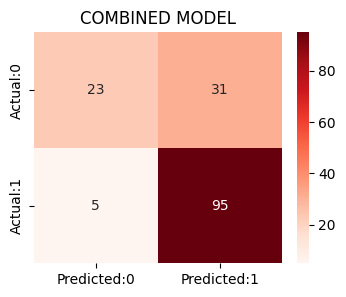

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.82      0.43      0.56        54
           1       0.75      0.95      0.84       100

    accuracy                           0.77       154
   macro avg       0.79      0.69      0.70       154
weighted avg       0.78      0.77      0.74       154



In [46]:
combinedModel_cm = pd.DataFrame(data = confusion_matrix(y_test, combined_pred),
                      columns = ['Predicted:0', 'Predicted:1'],
                      index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (4, 3))
plt.title('COMBINED MODEL')
sns.heatmap(combinedModel_cm, annot = True, fmt = 'd', cmap = "Reds")
plt.show()

print('The details for confusion matrix is =')
print(classification_report(y_test, combined_pred))